**                Classification**

> ***Classification is a technique for determining class the dependent belongs to based on the one or more independent variables. ***
> There  are  several  applications  for  Machine  Learning  (ML),  the  most  significant  of  which  is  data  mining.  People   are   often   prone   to   making   mistakes   during   analyses    or,    possibly,    when    trying    to    establish    relationships  between  multiple  features.  This  makes  it  difficult  for  them  to  find  solutions  to  certain  problems.  Machine  learning  can  often  be  successfully  applied  to  these problems, improving the efficiency of systems and the designs of machines

> Classification predicts the category the data belongs to.

> eg: Spam Detection, Churn Prediction, Sentiment Analysis,Dog Breed Detection.

*In this Paper i am using various machine learning techniques for analyzing the dataset and comparing different models to figure out which model is performing the best in this case.*

**About the Dataset**

> Context
> 
> This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

> Content
> 
> 
> Attribute Information:
>  1. age
>  2. sex
>  3. chest pain type (4 values)
>  4. resting blood pressure
>  5. serum cholestoral in mg/dl
>  6. fasting blood sugar > 120 mg/dl
>  7. resting electrocardiographic results (values 0,1,2)
>  8. maximum heart rate achieved
>  9. exercise induced angina
>  10. oldpeak = ST depression induced by exercise relative to rest
>  11. the slope of the peak exercise ST segment
>  12. number of major vessels (0-3) colored by flourosopy
>  13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
> 
> The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.
> 
> To see Test Costs (donated by Peter Turney), please see the folder "Costs" 

**Preprocessing Dataset**

> Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a proven method of resolving such issues. Data preprocessing prepares raw data for further processing.
> 
> Data preprocessing is used database-driven applications such as customer relationship management and rule-based applications (like neural networks).

In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [30]:
df=pd.read_csv("../input/heart.csv")

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


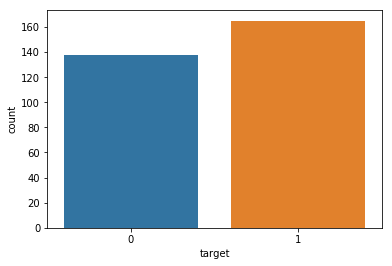

In [33]:
sns.countplot(x="target", data=df)

In [34]:
y = df.target.values

In [35]:
x_data = df.drop(["target"],axis=1)
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [36]:
x_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=56)

**Classification using Logisitic Regression **

> Logistic regression is kind of like linear regression but is used when the dependent variable is not a number, but something else (like a Yes/No response). Its called Regression but performs classification as based on the regression it classifies the dependent variable into either of the classes.

Logistic Function

> Logistic regression is named for the function used at the core of the method, the logistic function.
> 
> The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

> 1 / (1 + e^-value)

[](http://https://qph.fs.quoracdn.net/main-qimg-05edc1873d0103e36064862a45566dba)

> Representation Used for Logistic Regression
> 
> Logistic regression uses an equation as the representation, very much like linear regression.
> 
> Input values (x) are combined linearly using weights or coefficient values (referred to as the Greek capital letter Beta) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a numeric value.
> 
> Below is an example logistic regression equation:
> 
> y = e^(b0 + b1*x) / (1 + e^(b0 + b1*x))
> 
> Where y is the predicted output, b0 is the bias or intercept term and b1 is the coefficient for the single input value (x). Each column in your input data has an associated b coefficient (a constant real value) that must be learned from your training data.
> 
> The actual representation of the model that you would store in memory or in a file are the coefficients in the equation (the beta value or b’s).

> > **Practically applying Logistic Regression on our Dataset **

In [38]:
lr=LogisticRegression()

In [39]:
#Training the model
lr.fit(x_train,y_train)
print("test accuracy {}".format(lr.score(x_test,y_test)))
lr_score=lr.score(x_test,y_test)

test accuracy 0.7868852459016393


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
#Testing the model
y_prediction = lr.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual,y_prediction)

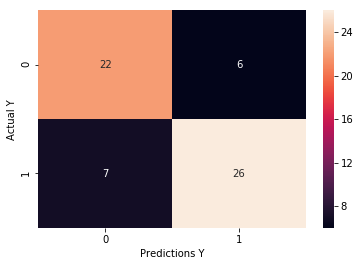

In [41]:
#Visualizing the results
sns.heatmap(cm, annot=True)
plt.xlabel("Predictions Y")
plt.ylabel("Actual Y")
plt.show()

**Classification using KNN**

> K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique.

> K-NN is a non-parametric, lazy learning algorithm. It classifies new cases based on a similarity measure (e.g. distance functions).

> A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor
> KNN works well with a small number of input variables (p), but struggles when the number of inputs is very large.

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn=KNeighborsClassifier()
#Training the model
knn.fit(x_train,y_train)
print("test accuracy {}".format(knn.score(x_test,y_test)))

knn_prediction_score=knn.score(x_test,y_test)

test accuracy 0.7868852459016393


In [44]:
#Testing the model
y_prediction = knn.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual,y_prediction)

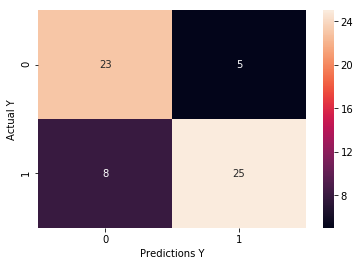

In [45]:
#Visualizing the result
sns.heatmap(cm, annot=True)
plt.xlabel("Predictions Y")
plt.ylabel("Actual Y")
plt.show()

**SVM : Support Vector Machine**

> Support Vector is used for both regression and Classification. It is based on the concept of decision planes that define decision boundaries. A decision plane(hyperplane) is one that separates between a set of objects having different class memberships.

> It performs classification by finding the hyperplane that maximizes the margin between the two classes with the help of support vectors.

> “Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well (look at the below snapshot).

In [46]:
from sklearn.svm import SVC

In [47]:
svm = SVC()
#Training the model
svm.fit(x_train,y_train)
# prediction and accuracy 
print("print accuracy of svm algo: ",svm.score(x_test,y_test))

svm_score = svm.score(x_test,y_test)

print accuracy of svm algo:  0.8032786885245902


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [48]:
#Testing the model
y_prediction = knn.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual,y_prediction)

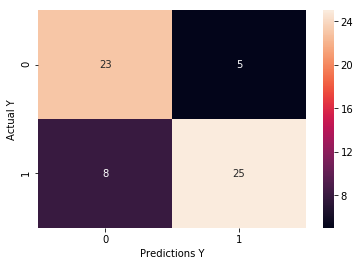

In [49]:
#Visualizing the results
sns.heatmap(cm, annot=True)
plt.xlabel("Predictions Y")
plt.ylabel("Actual Y")
plt.show()

**Decision Tree**

> Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. It follows Iterative Dichotomiser 3(ID3) algorithm structure for determining the split.
> Decision Tree uses Entropy and Information Gain to construct a decision tree.

> **Entropy**

> Entropy is the degree or amount of uncertainty in the randomness of elements or in other words it is a measure of impurity.
> Entropy
> 
> Intuitively, it tells us about the predictability of a certain event. Entropy calculates the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is an equally divided it has an entropy of one.
> 
> **Information Gain**

> It measures the relative change in entropy with respect to the independent attribute. It tries to estimate the information contained by each attribute. Constructing a decision tree is all about finding the attribute that returns the highest information gain (i.e., the most homogeneous branches).

In [50]:
from sklearn.tree import DecisionTreeClassifier



In [51]:
dt = DecisionTreeClassifier()
#Training the Model
dt.fit(x_train,y_train)

print("score: ", dt.score(x_test,y_test))

dt_score=dt.score(x_test,y_test)

score:  0.7213114754098361


In [52]:
#Testing the model
y_prediction = knn.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual,y_prediction)

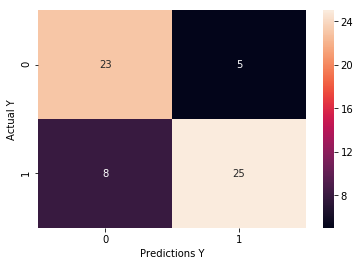

In [53]:
#Visulaizing the results
sns.heatmap(cm, annot=True)
plt.xlabel("Predictions Y")
plt.ylabel("Actual Y")
plt.show()

**Comparision**

> On Comparision of performance of each of these algorithm we can determine the algorithm which gives maximum accuracy and ca be used for production.

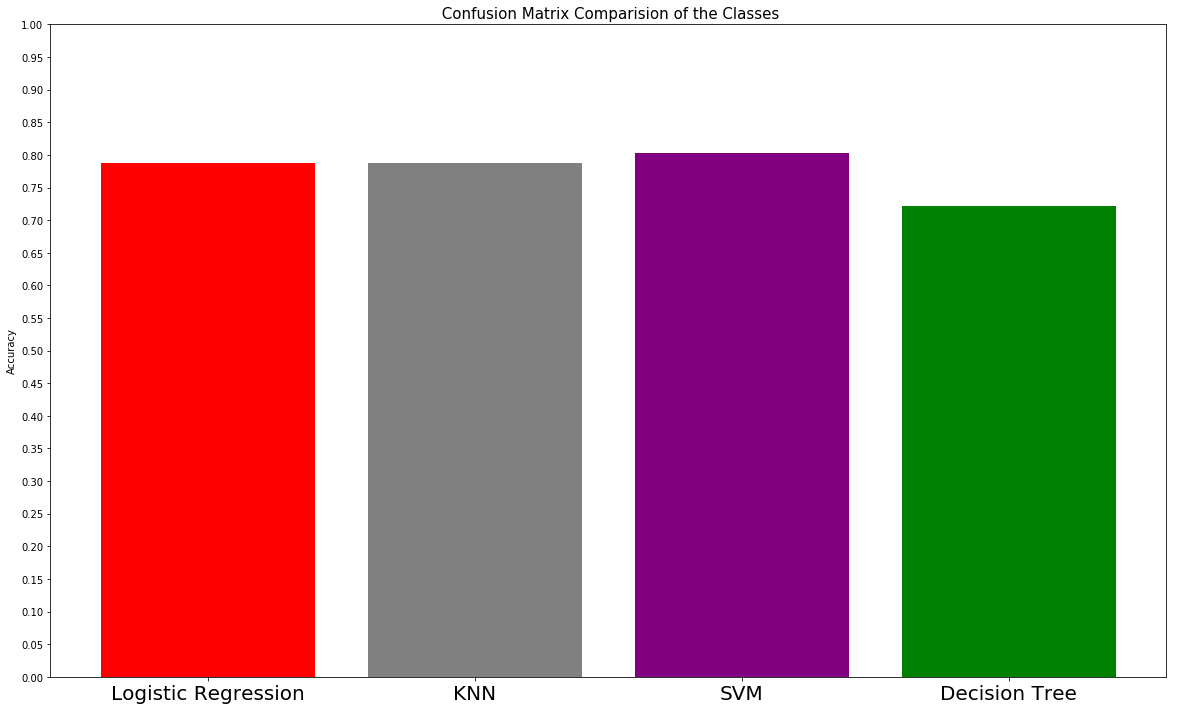

In [54]:
class_name = ("Logistic Regression","KNN","SVM","Decision Tree")
class_score = (lr_score,knn_prediction_score,svm_score,dt_score)
y_pos= np.arange(len(class_score))
colors = ("red","gray","purple","green")
plt.figure(figsize=(20,12))
plt.bar(y_pos,class_score,color=colors)
plt.xticks(y_pos,class_name,fontsize=20)
plt.yticks(np.arange(0.00, 1.05, step=0.05))
plt.ylabel('Accuracy')
plt.title(" Confusion Matrix Comparision of the Classes",fontsize=15)
plt.savefig('graph.png')
plt.show()

**Conclusion**
> 1. *Svm wins in this case by a very small margin,but the commpetition is very close.*
> 2. *Svm shows the highesst accuracy of 80%.*

**Selection of Algorithm**

> The  choice  of  which  specific  learning  algorithm  we  should  use  is  a  critical  step.  Once  preliminary  testing  is  judged  to  be  satisfactory,  the  classifier  (mapping  from  unlabeled  instances  to  classes)  is  available  for  routine  use.  The  classifier’s  evaluation  is  most  often  based  on  prediction accuracy (the percentage of correct prediction divided by the total number of predictions). There are at least  three  techniques  which  are  used  to  calculate  a  classifier’s   accuracy.   One   technique   is   to   split   the   training set by using two-thirds for training and the other third  for  estimating  performance.  In  another  technique,  known as cross-validation, the training set is divided into mutually  exclusive  and  equal-sized  subsets  and  for  each  subset  the  classifier  is  trained  on  the  union  of  all  the  other subsets. The average of the error rate of each subset is therefore an estimate of the error rate of the classifier. Leave-one-out   validation   is   a   special   case   of   cross   validation.  All  test  subsets  consist  of  a  single  instance.  This  type  of  validation  is,  of  course,  more  expensive  computationally,   but   useful   when   the   most   accurate   estimate of a classifier’s error rate is required.